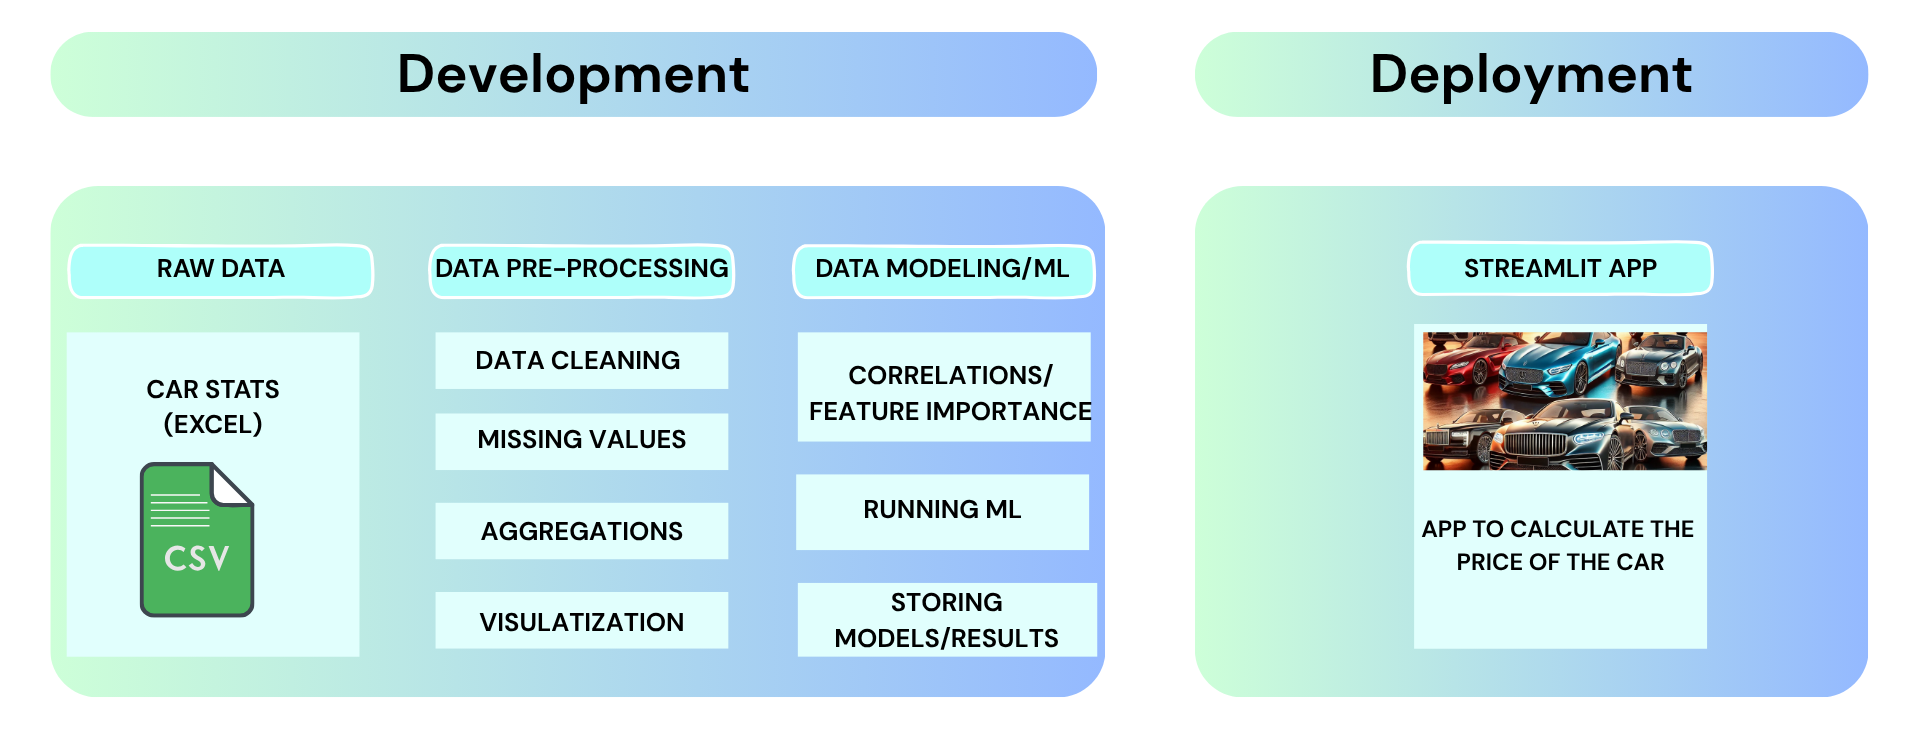

In [57]:
import os 
from IPython.display import Image
Image("Development.png",width=900,height=700)

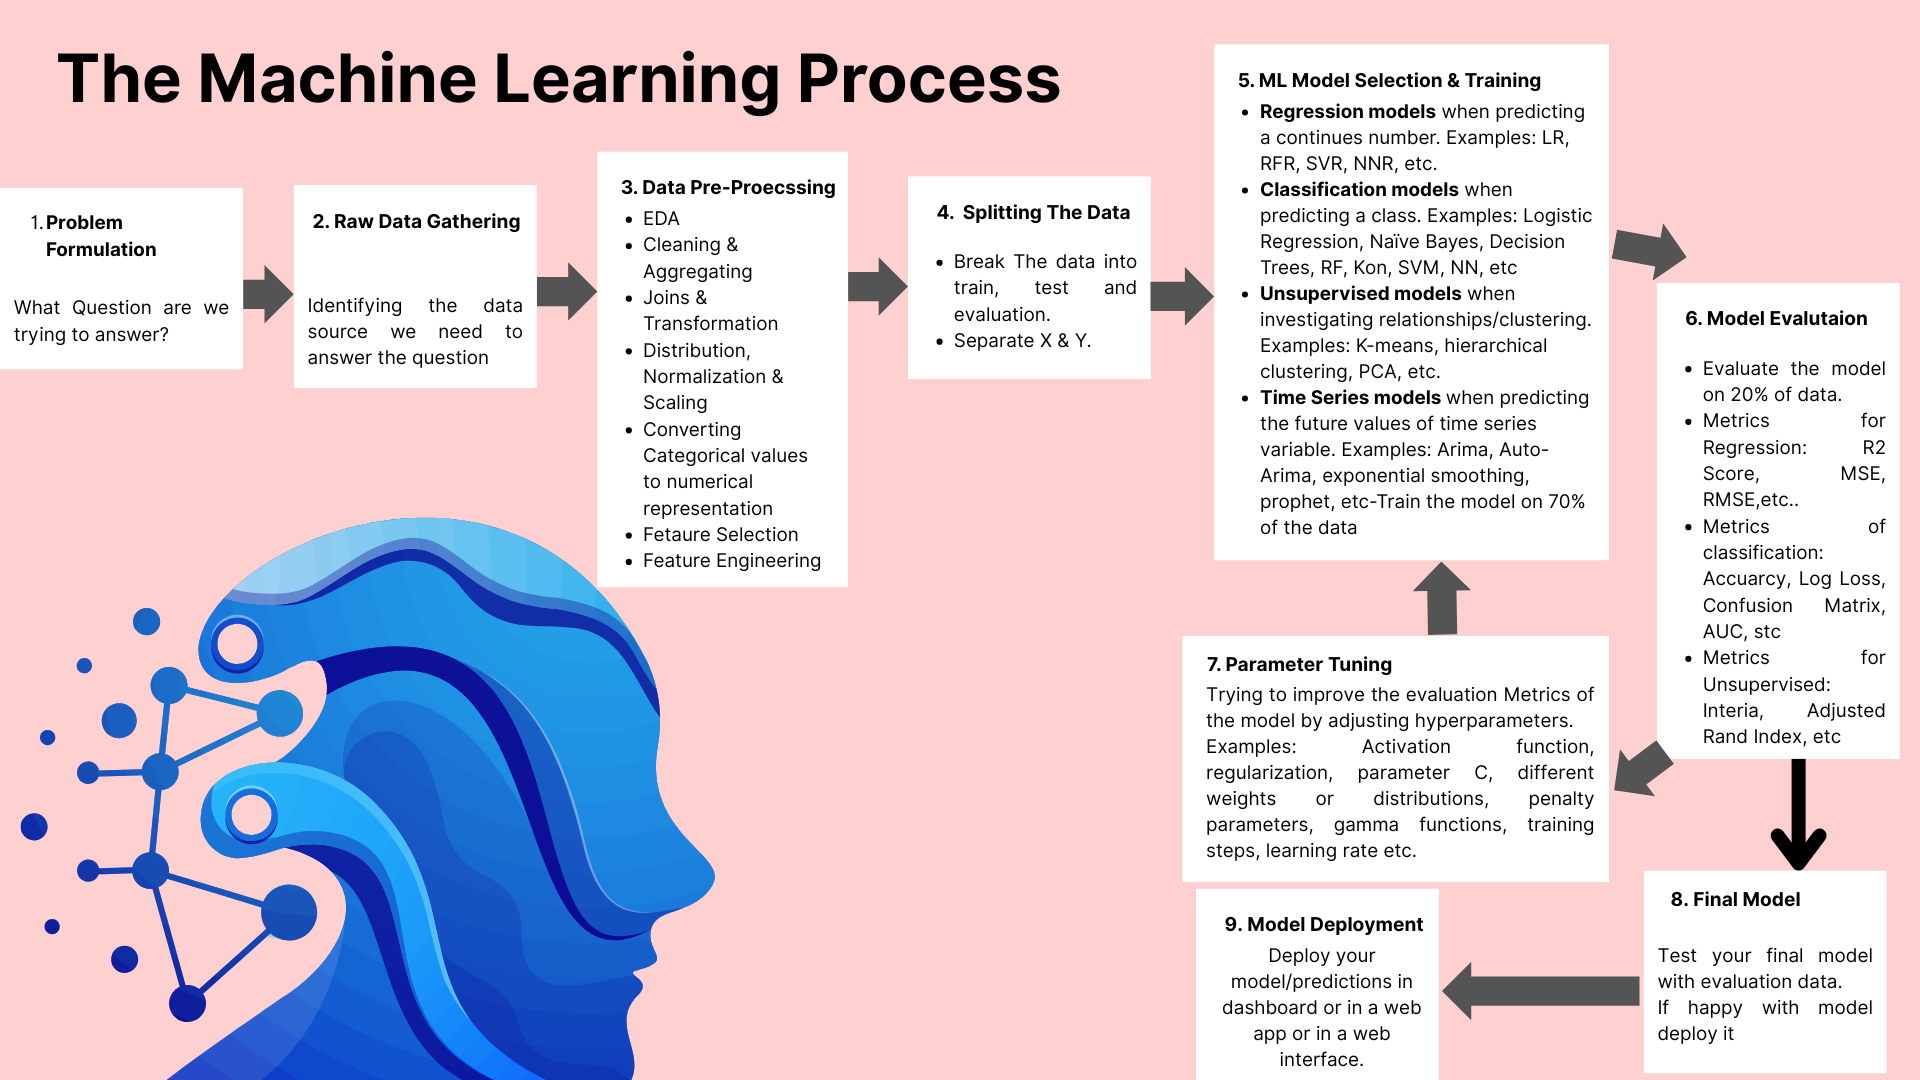

In [58]:
Image("Process.png",width=900,height=700)

### Problem Formulation
* We want to understadn which variables affects the car prices
* We want to be able to predict car prices

### Loading the Raw Data


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
import plotly.express as px

In [60]:
#loading the csv file
car_data=pd.read_csv("car_data.csv")
#SHape of the data
print(car_data.shape)
#getting the top 5 rows
car_data.head()

(1610, 17)


,index,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,Aston Martin,DBX707,2024,Base,"$242,000",NaN,"$242,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$33,653","$35,800",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$35,533","$37,800",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$38,917","$41,400",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$37,037","$39,400",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


### Data Preprocessing 
#### Understanding the data

In [61]:
for column in car_data:
    unique_val=np.unique(car_data[column].fillna('0'))
    nr_values=len(unique_val)
    if nr_values<=12:
        print("The number of values for feature {} :{}--{}".format(column,nr_values,unique_val))
    else:
        print("The number of values for feature {} :{}".format(column,nr_values))

The number of values for feature index :1610
The number of values for feature Make :7--['Aston Martin' 'Audi' 'BMW' 'Bentley' 'Ford' 'Mercedes-Benz' 'Nissan']
The number of values for feature Model :150
The number of values for feature Year :2--[2023 2024]
The number of values for feature Trim :373
The number of values for feature MSRP :1317
The number of values for feature Invoice Price :944
The number of values for feature Used/New Price :1317
The number of values for feature Body Size :3--['Compact' 'Large' 'Midsize']
The number of values for feature Body Style :12--['Cargo Minivan' 'Cargo Van' 'Convertible' 'Convertible SUV' 'Coupe'
 'Hatchback' 'Passenger Minivan' 'Passenger Van' 'Pickup Truck' 'SUV'
 'Sedan' 'Wagon']
The number of values for feature Cylinders :10--['0' 'I3' 'I4' 'I5' 'I6' 'V10' 'V12' 'V6' 'V8' 'W12']
The number of values for feature Engine Aspiration :6--['Electric Motor' 'Naturally Aspirated' 'Supercharged' 'Turbocharged'
 'Twin-Turbo' 'Twincharged']
The number 

In [62]:
#checking the null values
car_data.isnull().sum()

index                     0
Make                      0
Model                     0
Year                      0
Trim                      0
MSRP                      0
Invoice Price           552
Used/New Price            0
Body Size                 0
Body Style                0
Cylinders               165
Engine Aspiration         0
Drivetrain                0
Transmission              0
Horsepower                5
Torque                   27
Highway Fuel Economy    424
dtype: int64

#### Dealing with missing and null values

In [63]:
car_data.columns

Index(['index', 'Make', 'Model', 'Year', 'Trim', 'MSRP', 'Invoice Price',
       'Used/New Price', 'Body Size', 'Body Style', 'Cylinders',
       'Engine Aspiration', 'Drivetrain', 'Transmission', 'Horsepower',
       'Torque', 'Highway Fuel Economy'],
      dtype='object')

In [64]:
#Dropping the column that has alot of null values
car_data=car_data.drop(['Invoice Price','Cylinders','Highway Fuel Economy'],axis=1)

In [65]:
car_data['Horsepower_no']=car_data['Horsepower'].str[0:3].astype(float)

car_data[car_data['Horsepower_no'].isna()]

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_no
371,971,Ford,F-150 Lightning,2024,Flash,"$67,995","$67,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
372,972,Ford,F-150 Lightning,2024,Lariat,"$76,995","$76,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
373,973,Ford,F-150 Lightning,2024,Platinum,"$84,995","$84,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
374,974,Ford,F-150 Lightning,2024,Pro,"$54,995","$54,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
375,975,Ford,F-150 Lightning,2024,XLT,"$62,995","$62,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN


In [66]:
mean_horsepower=car_data['Horsepower_no'][car_data["Make"]=="Ford"].mean()

car_data['Horsepower_no']=car_data['Horsepower_no'].fillna(mean_horsepower)
car_data['Horsepower']=car_data['Horsepower'].fillna(mean_horsepower)

In [67]:
car_data.isnull().sum()

index                 0
Make                  0
Model                 0
Year                  0
Trim                  0
MSRP                  0
Used/New Price        0
Body Size             0
Body Style            0
Engine Aspiration     0
Drivetrain            0
Transmission          0
Horsepower            0
Torque               27
Horsepower_no         0
dtype: int64

In [68]:
car_data['Torque'].head()

0    663 ft-lbs. @ 2750 rpm
1    221 ft-lbs. @ 4100 rpm
2    221 ft-lbs. @ 4000 rpm
3    221 ft-lbs. @ 4000 rpm
4    221 ft-lbs. @ 4100 rpm
Name: Torque, dtype: object

In [69]:
car_data['Torque_no']=car_data['Torque'].str[0:3].astype(float)
car_data[car_data['Torque_no'].isna()]

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_no,Torque_no
42,42,Audi,Q4 Sportback e-tron,2024,Premium w/55,"$58,200","$58,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
44,44,Audi,Q4 Sportback e-tron,2024,Premium Plus w/55,"$62,900","$62,900",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
46,46,Audi,Q4 Sportback e-tron,2024,Prestige w/55,"$65,200","$65,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
49,49,Audi,Q4 e-tron,2024,Premium w/55,"$55,200","$55,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
52,52,Audi,Q4 e-tron,2024,Premium Plus w/55,"$59,900","$59,900",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
54,54,Audi,Q4 e-tron,2024,Prestige w/55,"$62,200","$62,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
75,75,Audi,Q8 Sportback e-tron,2024,Premium Plus S line,"$82,200","$82,200",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN
76,76,Audi,Q8 Sportback e-tron,2024,Premium S line,"$77,800","$77,800",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN
77,77,Audi,Q8 Sportback e-tron,2024,Prestige S line,"$88,200","$88,200",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN
78,78,Audi,Q8 e-tron,2024,Premium,"$74,400","$74,400",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN


In [70]:
mean_torque=car_data['Torque_no'].mean()
car_data['Torque_no']=car_data['Torque_no'].fillna(mean_torque)
car_data['Torque']=car_data['Torque'].fillna(mean_torque)
car_data.isnull().sum()

index                0
Make                 0
Model                0
Year                 0
Trim                 0
MSRP                 0
Used/New Price       0
Body Size            0
Body Style           0
Engine Aspiration    0
Drivetrain           0
Transmission         0
Horsepower           0
Torque               0
Horsepower_no        0
Torque_no            0
dtype: int64

#### Cleaning The data type

In [71]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1610 non-null   int64  
 1   Make               1610 non-null   object 
 2   Model              1610 non-null   object 
 3   Year               1610 non-null   int64  
 4   Trim               1610 non-null   object 
 5   MSRP               1610 non-null   object 
 6   Used/New Price     1610 non-null   object 
 7   Body Size          1610 non-null   object 
 8   Body Style         1610 non-null   object 
 9   Engine Aspiration  1610 non-null   object 
 10  Drivetrain         1610 non-null   object 
 11  Transmission       1610 non-null   object 
 12  Horsepower         1610 non-null   object 
 13  Torque             1610 non-null   object 
 14  Horsepower_no      1610 non-null   float64
 15  Torque_no          1610 non-null   float64
dtypes: float64(2), int64(2),

In [72]:
#we need to convert MSRP and Used/New Price as Int
car_data['MSRP']=car_data['MSRP'].str.replace("$","")
car_data['MSRP']=car_data["MSRP"].str.replace(',','').astype(float)

car_data['Used/New Price']=car_data['Used/New Price'].str.replace("$","")
car_data['Used/New Price']=car_data['Used/New Price'].str.replace(",",'').astype(float)

In [73]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1610 non-null   int64  
 1   Make               1610 non-null   object 
 2   Model              1610 non-null   object 
 3   Year               1610 non-null   int64  
 4   Trim               1610 non-null   object 
 5   MSRP               1610 non-null   float64
 6   Used/New Price     1610 non-null   float64
 7   Body Size          1610 non-null   object 
 8   Body Style         1610 non-null   object 
 9   Engine Aspiration  1610 non-null   object 
 10  Drivetrain         1610 non-null   object 
 11  Transmission       1610 non-null   object 
 12  Horsepower         1610 non-null   object 
 13  Torque             1610 non-null   object 
 14  Horsepower_no      1610 non-null   float64
 15  Torque_no          1610 non-null   float64
dtypes: float64(4), int64(2),

#### Visulaizing the data

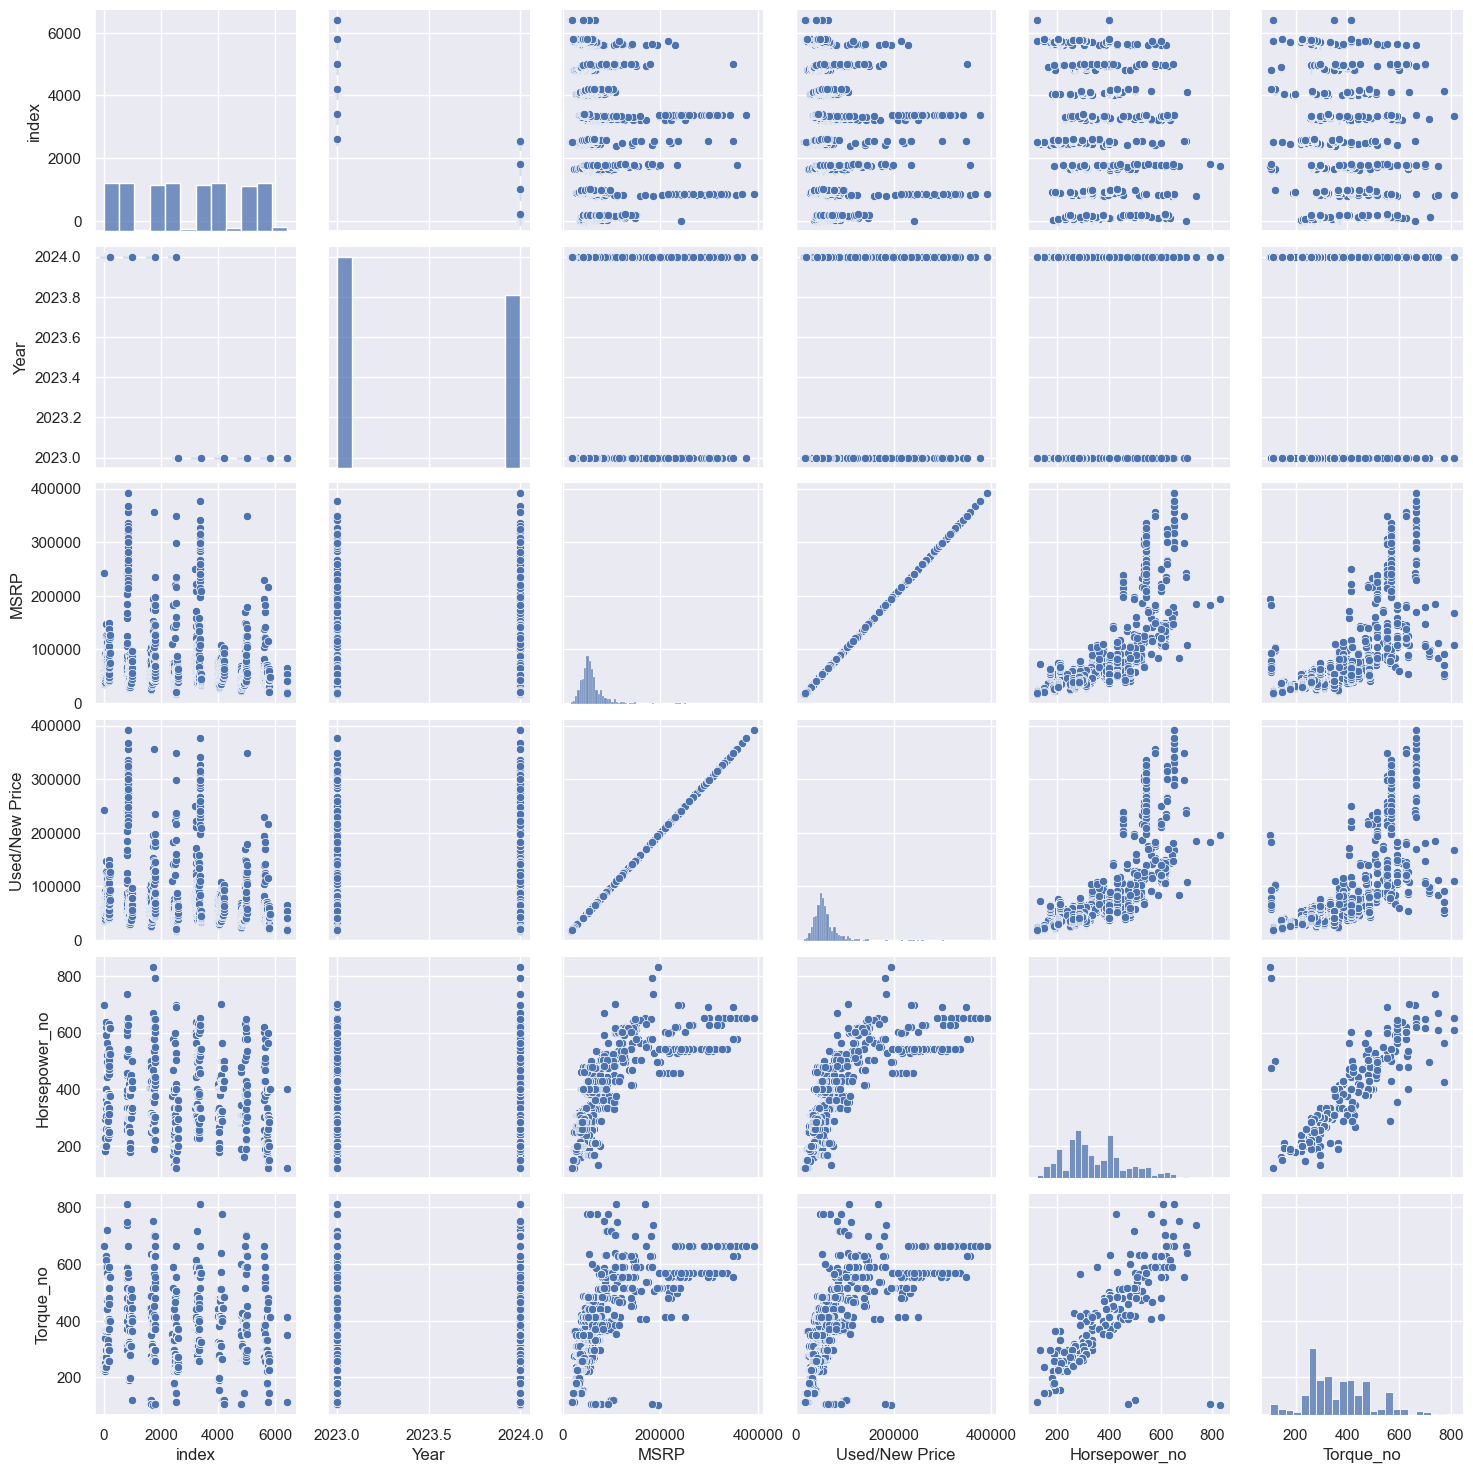

In [74]:
sns.pairplot(car_data)
#Note: Never run this on big data it will take a lot of time

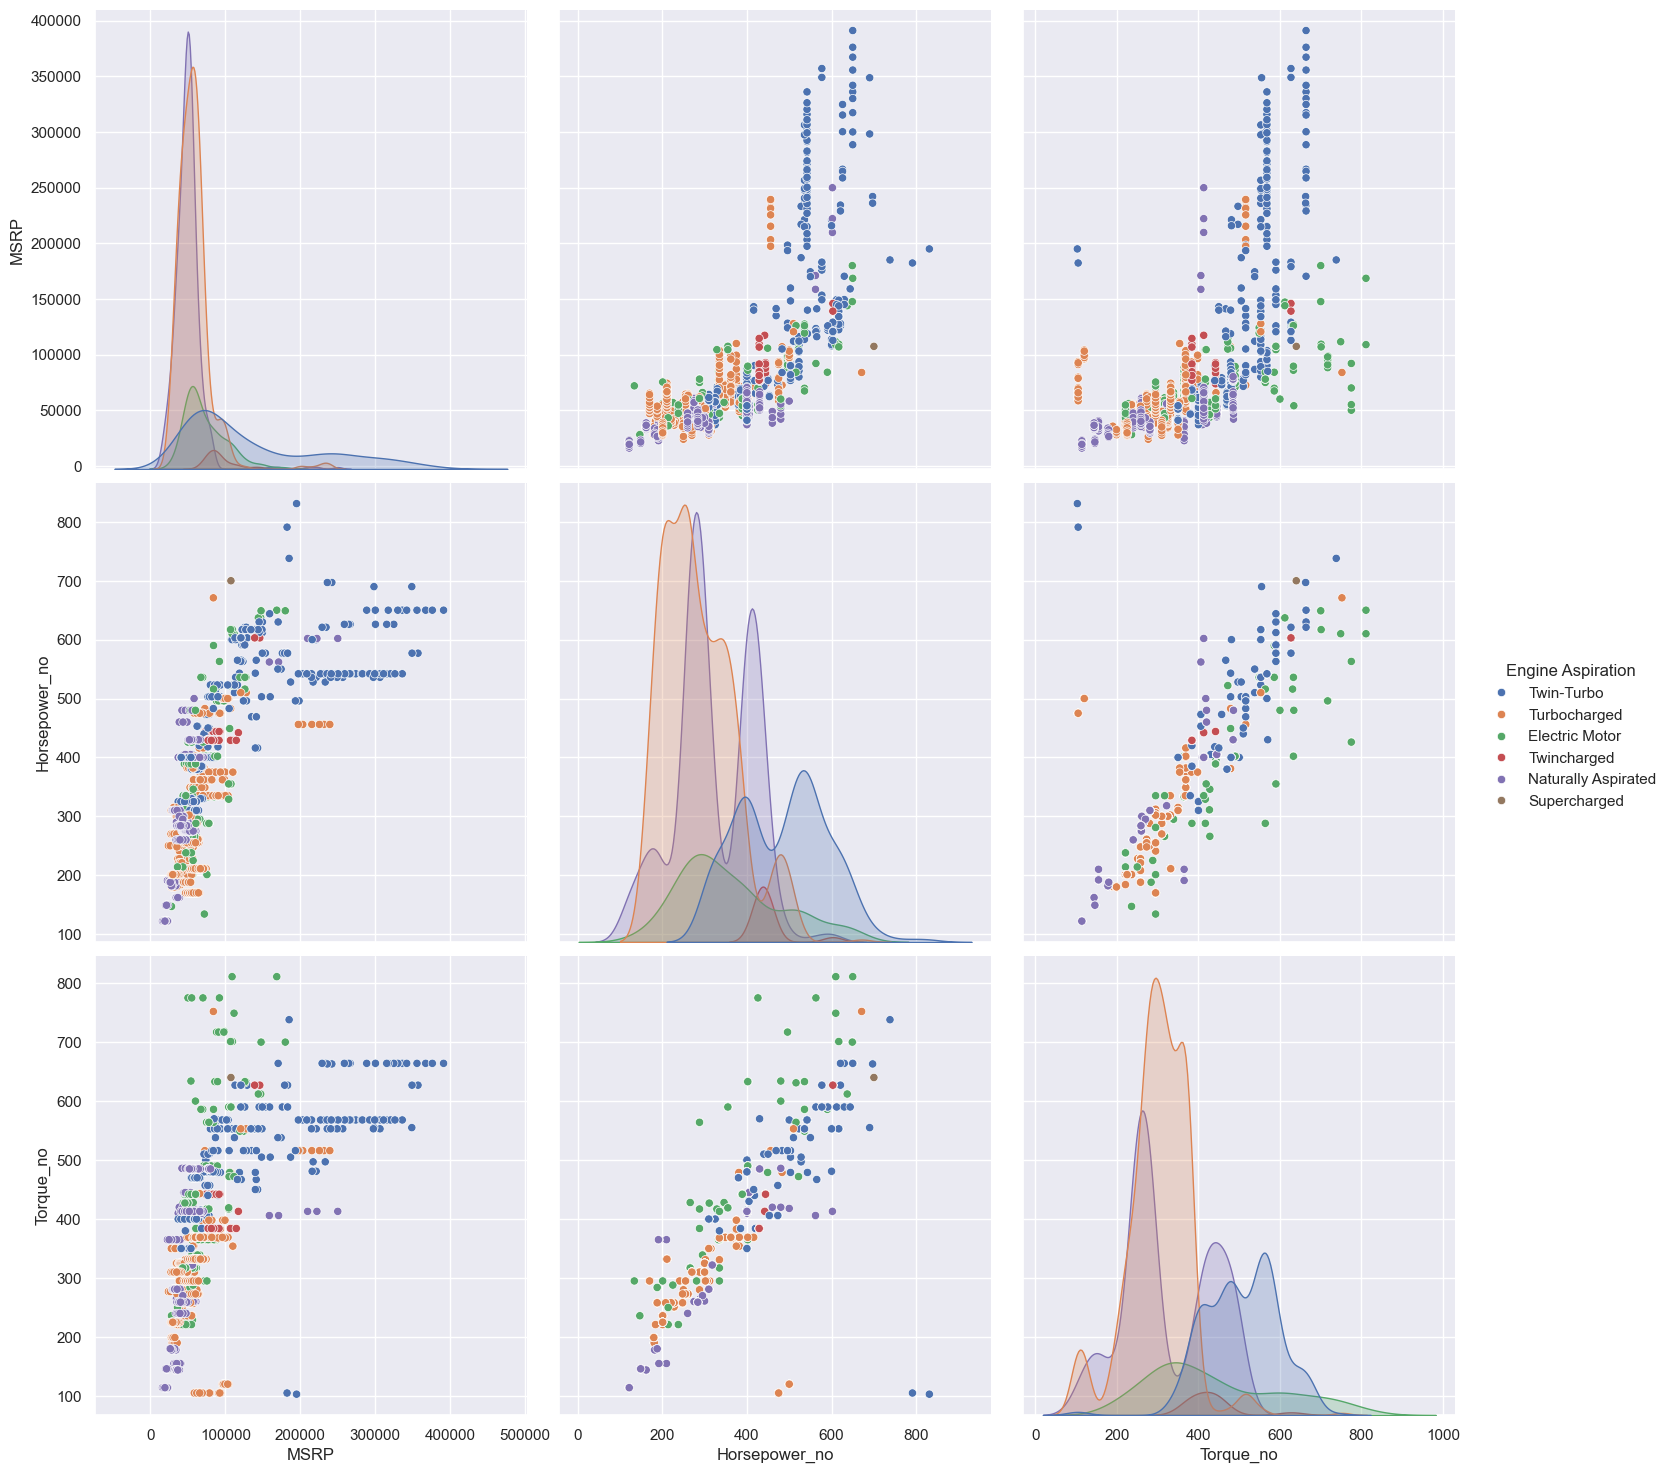

In [75]:
#Visulazing the subset of our data-important feature
sns.pairplot(car_data[['MSRP','Horsepower_no','Torque_no','Engine Aspiration']],hue='Engine Aspiration',height=5)

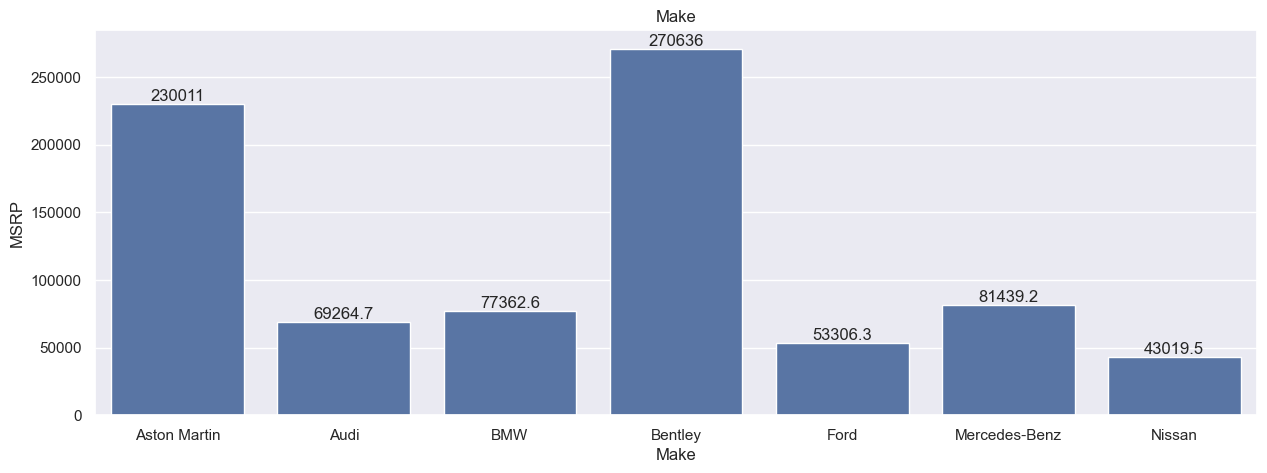

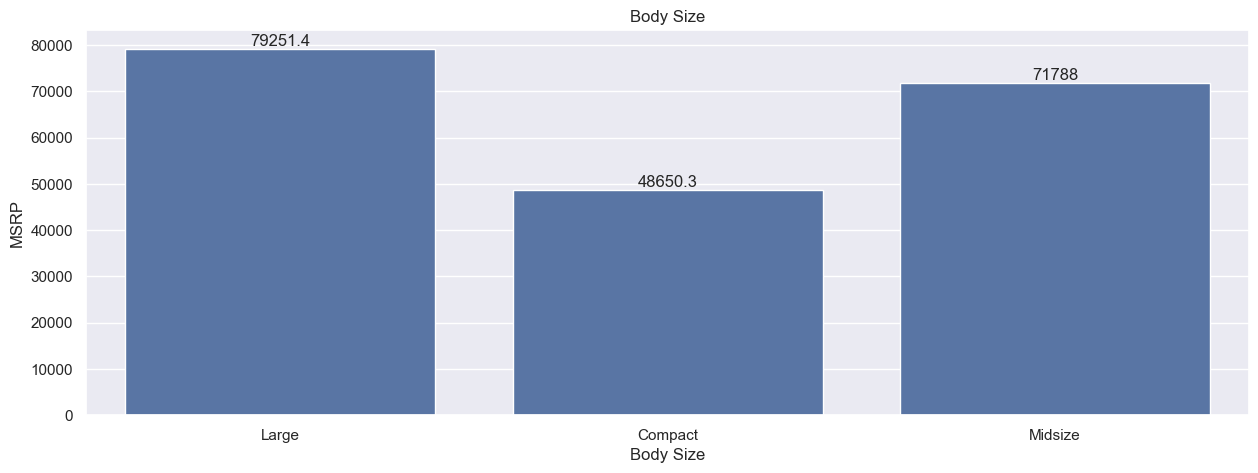

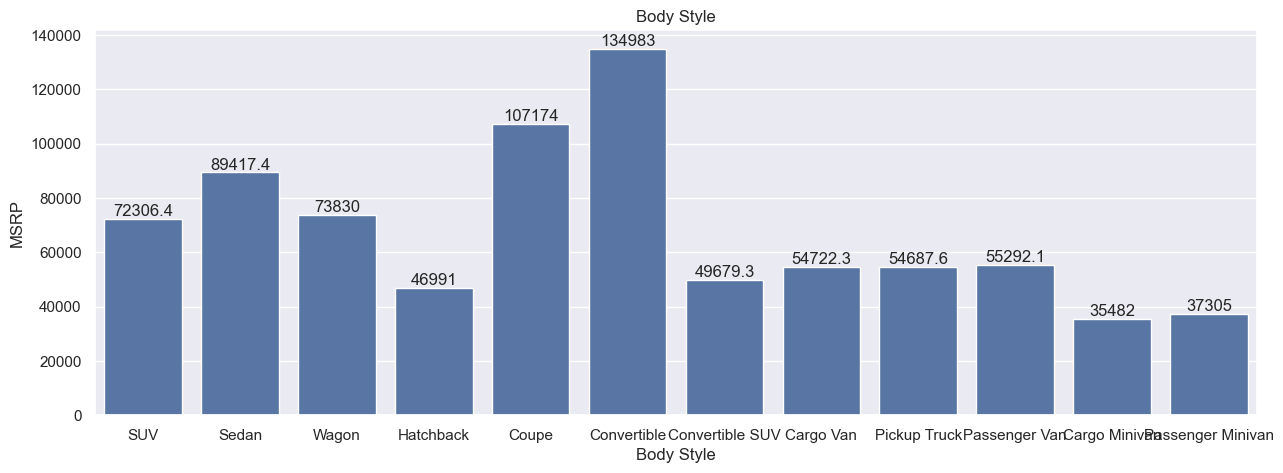

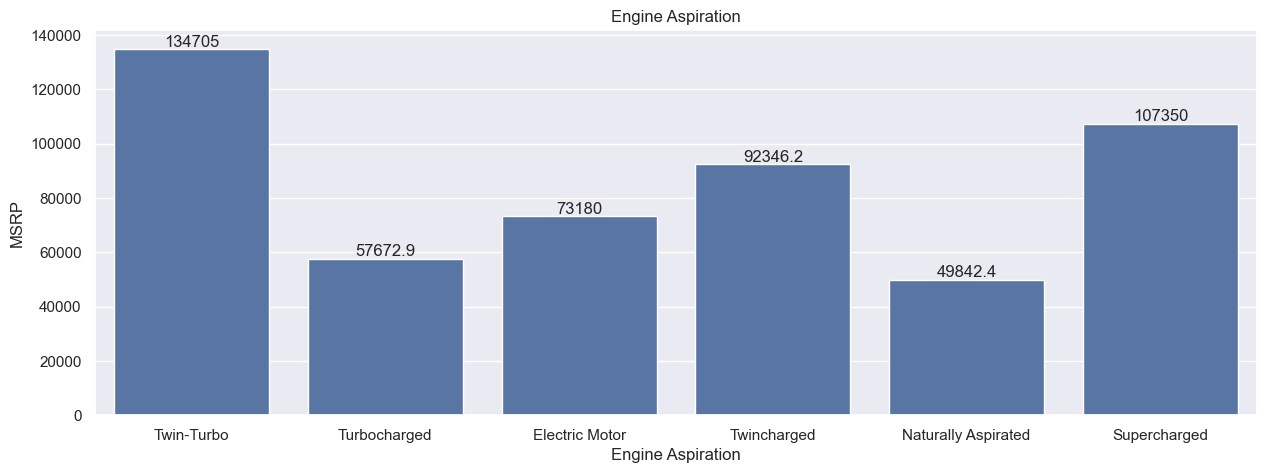

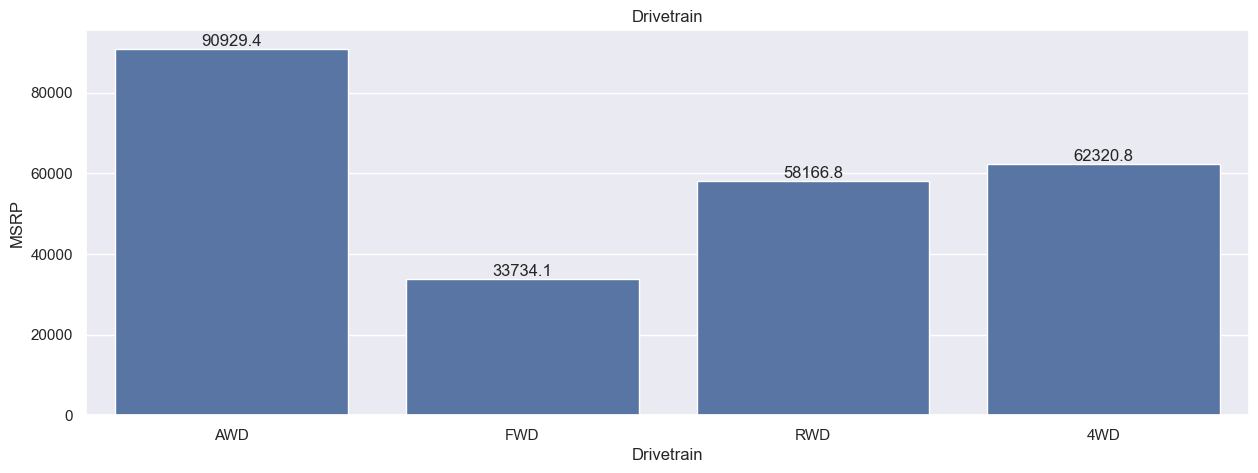

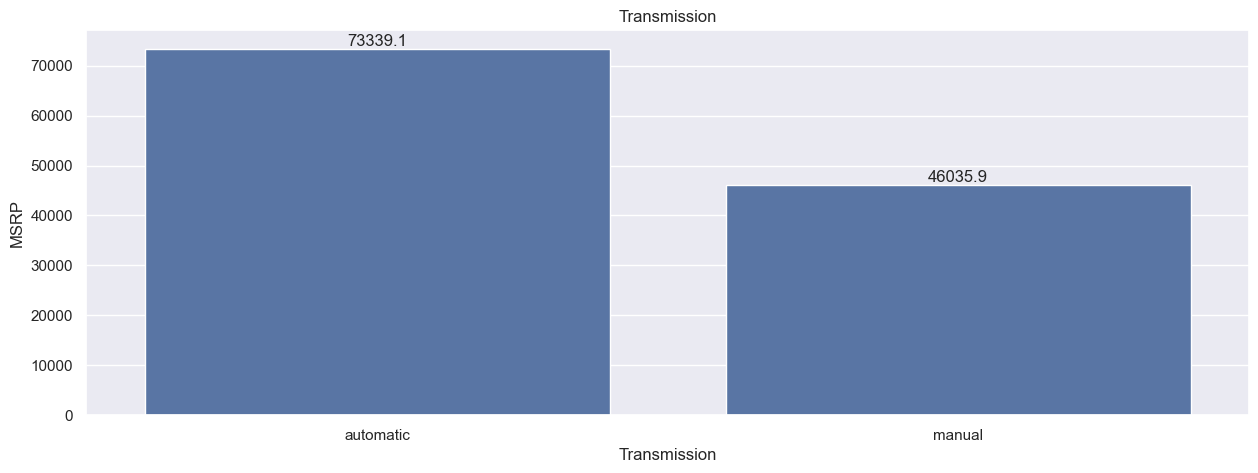

In [76]:
categories=['Make','Body Size','Body Style','Engine Aspiration','Drivetrain','Transmission']
sns.set(rc={'figure.figsize':(15,5)})
for c in categories:
    ax=sns.barplot(x=c,y='MSRP',data=car_data,errorbar=('ci',False))
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

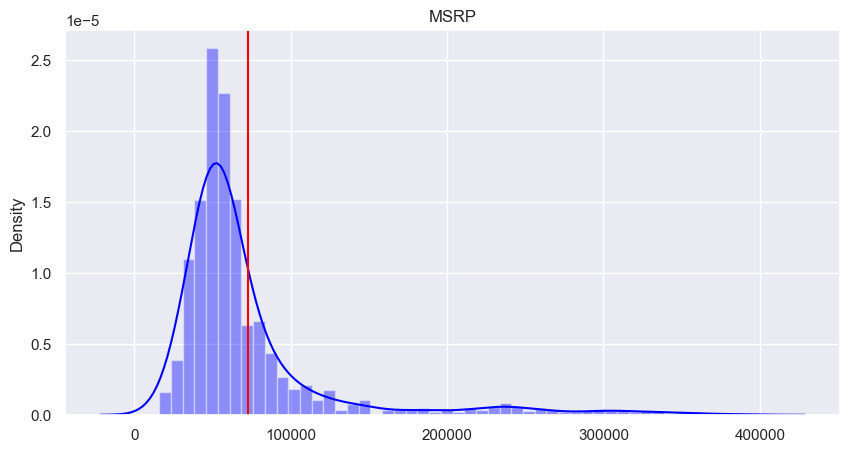

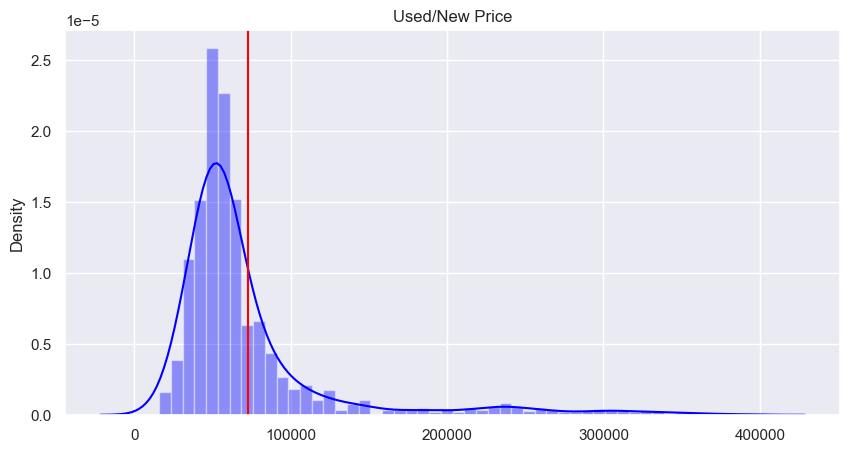

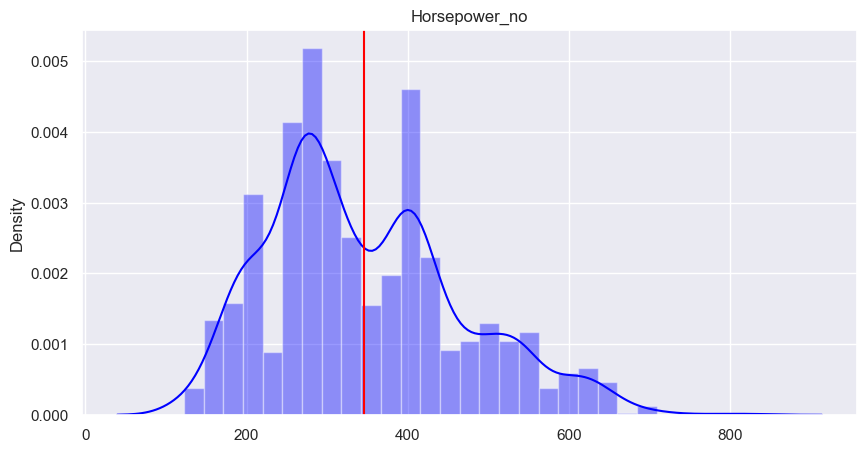

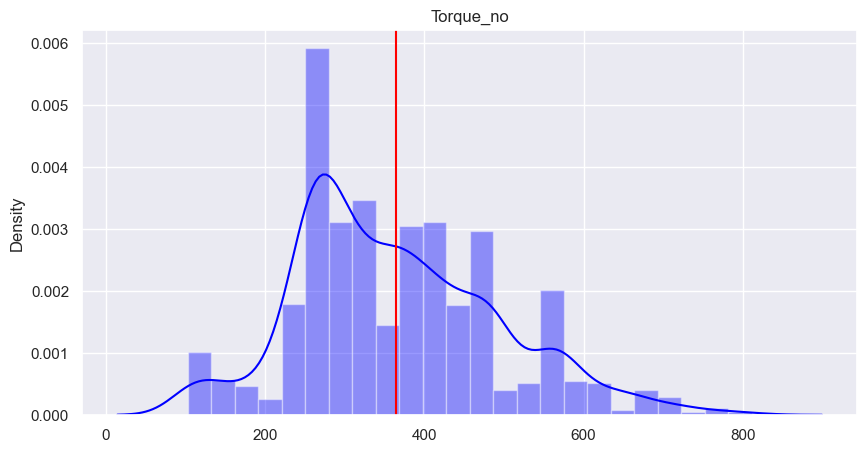

In [77]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

n_variable=['MSRP','Used/New Price','Horsepower_no','Torque_no']
sns.set(rc={'figure.figsize':(10,5)})

for n in n_variable:
    x=car_data[n].values
    sns.distplot(x,color='blue');
    
    mean=car_data[n].mean()
    plt.axvline(mean,0,1,color='red')
    plt.title(n)
    plt.show()

The meadina is: 55945.0


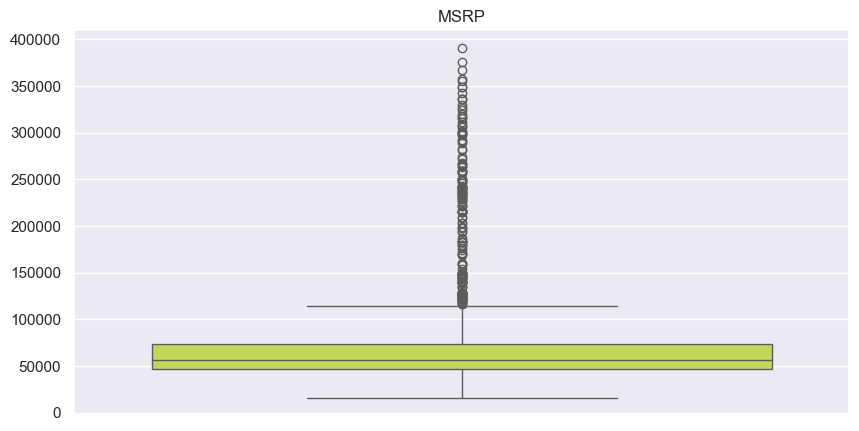

The meadina is: 55945.0


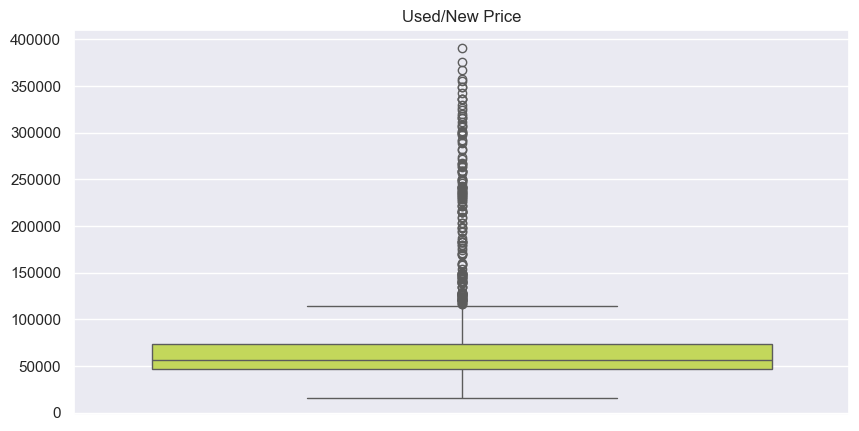

The meadina is: 325.0


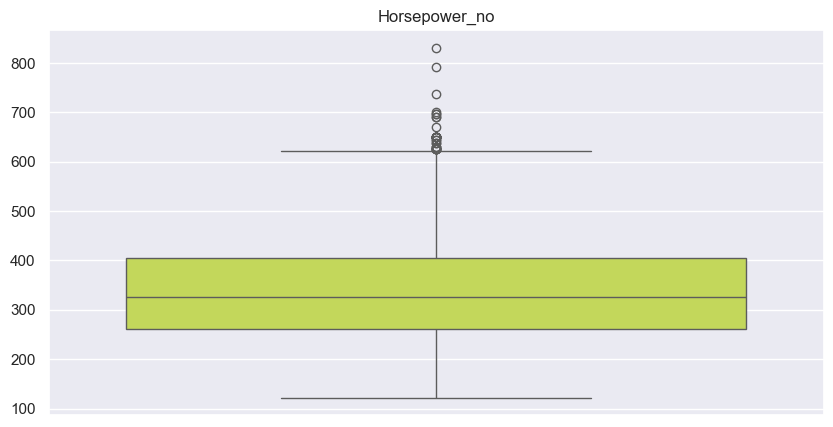

The meadina is: 350.0


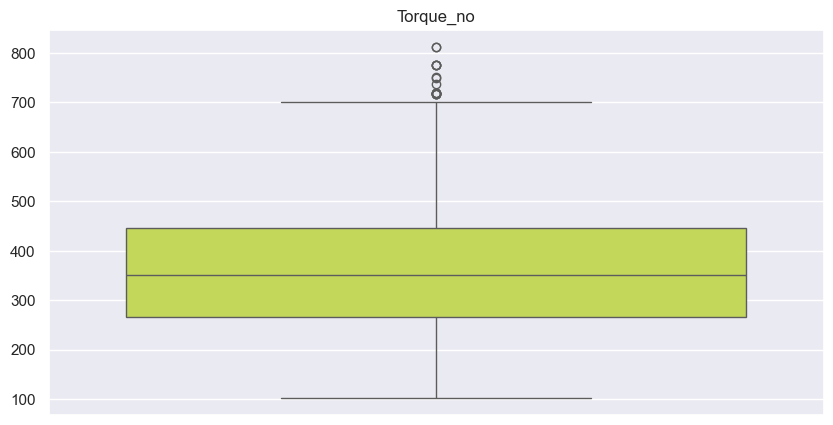

In [78]:
sns.set(rc={'figure.figsize':(10,5)})
for c in n_variable:
    x=car_data[c].values
    ax=sns.boxplot(x,color='#D1EC46')
    print("The meadina is:", car_data[c].median())
    plt.title(c)
    plt.show()

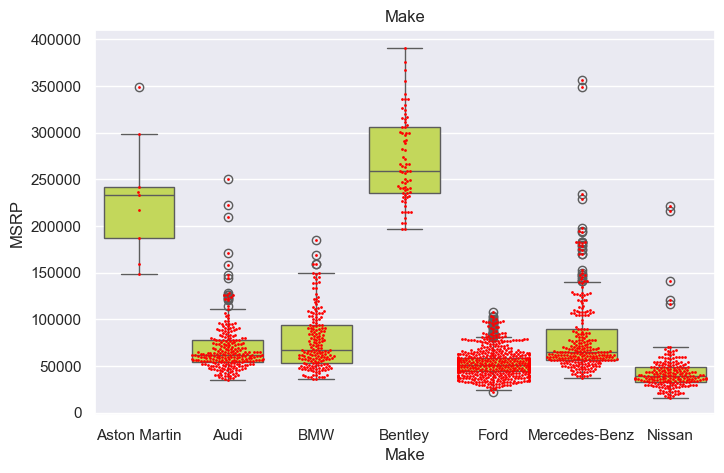

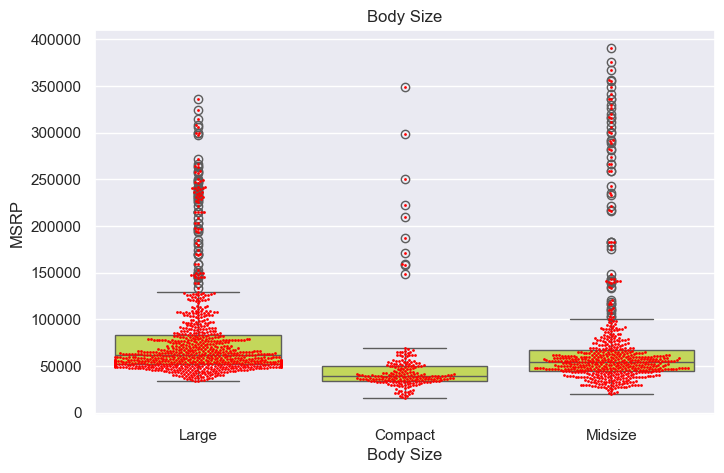

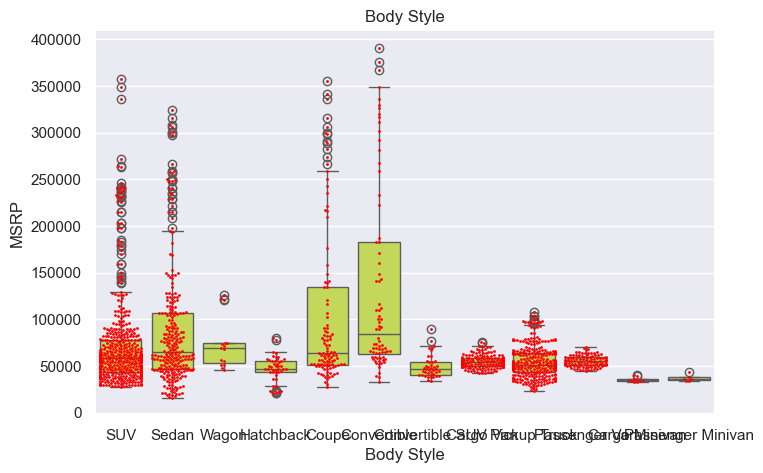

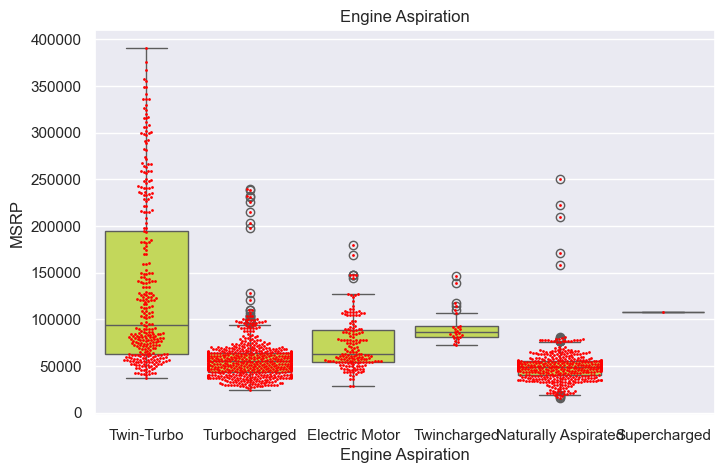

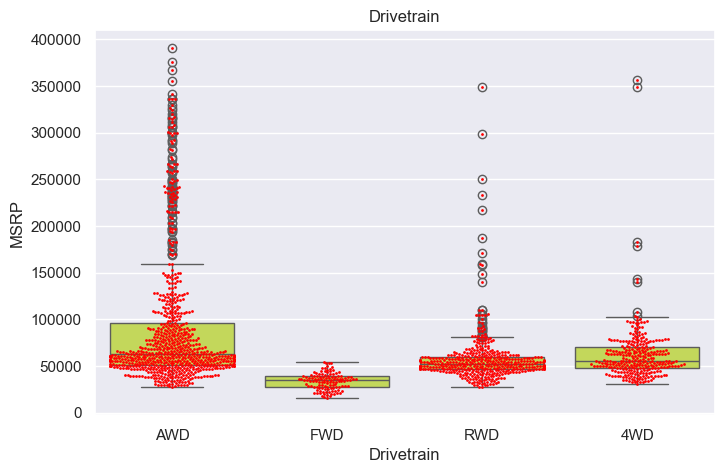

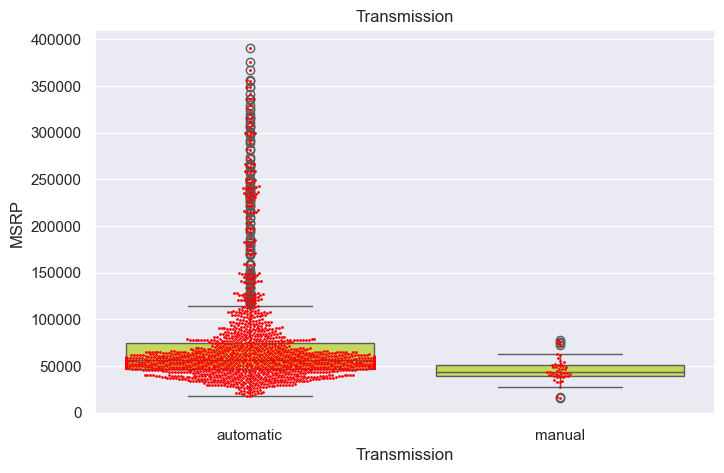

In [79]:
categories=['Make',
 'Body Size',
 'Body Style',
 'Engine Aspiration',
 'Drivetrain',
 'Transmission']
sns.set(rc={'figure.figsize':(8,5)})
for c in categories:
    ax=sns.boxplot(x=c,y='MSRP',data=car_data,color='#D1EC46')
    ax=sns.swarmplot(x=c,y='MSRP',data=car_data,color='red',s=2)
    plt.title(c)
    plt.show()

##### Preparing the final DF

In [80]:
car_data.columns

Index(['index', 'Make', 'Model', 'Year', 'Trim', 'MSRP', 'Used/New Price',
       'Body Size', 'Body Style', 'Engine Aspiration', 'Drivetrain',
       'Transmission', 'Horsepower', 'Torque', 'Horsepower_no', 'Torque_no'],
      dtype='object')

In [81]:
new_car_data=car_data.drop(['index', 'Model', 'Year', 'Trim','Used/New Price','Horsepower','Torque'],axis=1)
new_car_data.head()

,Make,MSRP,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower_no,Torque_no
0,Aston Martin,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697.0,663.0
1,Audi,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
2,Audi,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
3,Audi,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
4,Audi,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0


In [82]:
new_car_data.columns

Index(['Make', 'MSRP', 'Body Size', 'Body Style', 'Engine Aspiration',
       'Drivetrain', 'Transmission', 'Horsepower_no', 'Torque_no'],
      dtype='object')

In [83]:
new_car_data=pd.get_dummies(new_car_data,columns=['Make','Body Size', 'Body Style', 'Engine Aspiration','Drivetrain', 'Transmission'])
new_car_data.head()

,MSRP,Horsepower_no,Torque_no,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Ford,Make_Mercedes-Benz,Make_Nissan,...,Engine Aspiration_Supercharged,Engine Aspiration_Turbocharged,Engine Aspiration_Twin-Turbo,Engine Aspiration_Twincharged,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Transmission_automatic,Transmission_manual
0,242000.0,697.0,663.0,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,35800.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
2,37800.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
3,41400.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,39400.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False


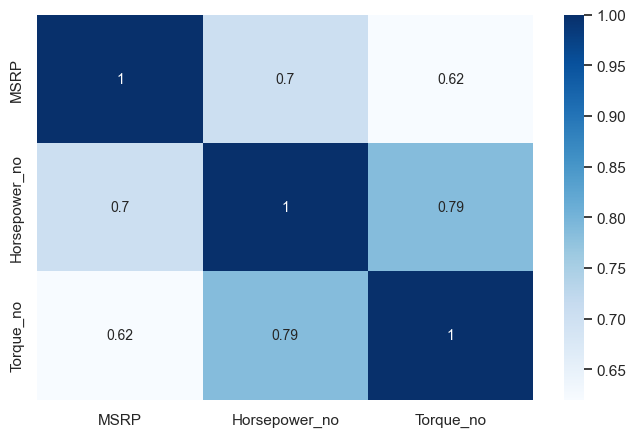

In [84]:
sns.set(rc={'figure.figsize':(8,5)})
n_variable=['MSRP','Horsepower_no','Torque_no']
pc=new_car_data[n_variable].corr(method='pearson')
cols=n_variable
ax=sns.heatmap(pc,annot=True,yticklabels=cols,xticklabels=cols,annot_kws={'size':10},cmap='Blues')

#### Feature Importance
Steps of running feature importance
* Split the data x & y
* Run a tree based estimators
* Run feature importance
* We measure the importance of a feautre by calcualtin the increas in the model's prediction error after premuting the feature

In [85]:
x=new_car_data.drop(['MSRP'],axis=1).values
X_columns=new_car_data.drop(['MSRP'],axis=1)
y=new_car_data['MSRP'].astype(int)
print(x.shape)
print(y.shape)

(1610, 36)
(1610,)


In [86]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=10)
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [87]:
# Calculating FI
for i, column in enumerate(new_car_data.drop('MSRP', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature Horsepower_no:, 0.247
Importance of feature Torque_no:, 0.123
Importance of feature Make_Aston Martin:, 0.000
Importance of feature Make_Audi:, 0.023
Importance of feature Make_BMW:, 0.014
Importance of feature Make_Bentley:, 0.013
Importance of feature Make_Ford:, 0.124
Importance of feature Make_Mercedes-Benz:, 0.021
Importance of feature Make_Nissan:, 0.006
Importance of feature Body Size_Compact:, 0.021
Importance of feature Body Size_Large:, 0.043
Importance of feature Body Size_Midsize:, 0.032
Importance of feature Body Style_Cargo Minivan:, 0.001
Importance of feature Body Style_Cargo Van:, 0.025
Importance of feature Body Style_Convertible:, 0.007
Importance of feature Body Style_Convertible SUV:, 0.001
Importance of feature Body Style_Coupe:, 0.008
Importance of feature Body Style_Hatchback:, 0.000
Importance of feature Body Style_Passenger Minivan:, 0.001
Importance of feature Body Style_Passenger Van:, 0.001
Importance of feature Body Style_Pickup Truck

,level_0,index,Variable,Feature Importance Score
0,0,0.0,Horsepower_no,0.247000
1,27,NaN,Horsepower_no,0.246967
2,33,NaN,Make_Ford,0.123919
3,1,6.0,Make_Ford,0.123900
4,2,1.0,Torque_no,0.122600
...,...,...,...,...
58,29,NaN,Make_Aston Martin,0.000454
59,44,NaN,Body Style_Hatchback,0.000329
60,59,NaN,Drivetrain_FWD,0.000329
61,53,NaN,Engine Aspiration_Supercharged,0.000000


##### Splitting The Raw Data Hold Out Validation

In [88]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.80,test_size=0.2,random_state=15)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1288, 36)
(322, 36)
(1288,)
(322,)


##### Running Regression

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,explained_variance_score,mean_absolute_error,mean_squared_error
from math import sqrt
lm=LinearRegression(fit_intercept=True)
lm.fit(X_train,y_train)
y_pred=lm.predict(X_train)
all_df_predict=lm.predict(x)

In [90]:
#Model Accuracy
print("The accuracy on training dataset is: ", lm.score(X_train,y_train))
print("The accuracy r2 score on training dataset prediction is", r2_score(y_train,y_pred))

print(" ")
print("The accuracy on testing dataset is ",lm.score(X_test,y_test))
print("The accuracy on testing dataset is ",r2_score(y_test,lm.predict(X_test) ))

print(" ")
print("The RMSE on the training dataset is ", sqrt(mean_squared_error(y_train,y_pred)))
print("The RMSE on testing dataset is : ", sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print(" ")
print("The MAE on the training dataset is: ",mean_absolute_error(y_train,y_pred))
print("The MAE on the tesing datatset is: ", mean_absolute_error(y_test,lm.predict(X_test)))

print(" ")


The accuracy on training dataset is:  0.895779183244086
The accuracy r2 score on training dataset prediction is 0.895779183244086
 
The accuracy on testing dataset is  0.9198625302493008
The accuracy on testing dataset is  0.9198625302493008
 
The RMSE on the training dataset is  17421.7784480966
The RMSE on testing dataset is :  16534.594571973663
 
The MAE on the training dataset is:  10599.011937878482
The MAE on the tesing datatset is:  11090.08834959268
 


#### Storing Our Models & Results

In [91]:
with open('linear_model.pkl','wb') as f:
    pickle.dump(lm,f)

In [92]:
final_fi['Feature Importance Score']=final_fi['Feature Importance Score'].round(4)
final_fi=final_fi.head(27)
final_fi.to_excel("feature_importance.xlsx")

In [93]:
car_data['MSRP Prediction']=all_df_predict
car_data.to_excel('data_with_pred.xlsx')

##### Stream App Deployment

In [94]:
X_columns.head()

,Horsepower_no,Torque_no,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Ford,Make_Mercedes-Benz,Make_Nissan,Body Size_Compact,...,Engine Aspiration_Supercharged,Engine Aspiration_Turbocharged,Engine Aspiration_Twin-Turbo,Engine Aspiration_Twincharged,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Transmission_automatic,Transmission_manual
0,697.0,663.0,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,201.0,221.0,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,True,False,True,False
2,201.0,221.0,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
3,201.0,221.0,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
4,201.0,221.0,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,True,False,True,False


In [95]:
#Function to gather all of our data

#Feature selection os siderbar
import streamlit as st

def user_input():
    horsepower=st.sidebar.number_input(('Horsepower (NO)'),min_value=0,max_value=1000, step=1,value=300)
    torque=st.sidebar.number_input(("Torque (NO)"),min_value=0,max_value=1500,step=1,value=400)
    
    make=st.sidebar.selectbox("Make",['Aston Martin', 'Audi', 'BMW', 'Bentley', 'Ford', 'Mercedes-Benz', 'Nissan'])
    body_size=st.sidebar.selectbox('Body Size', ['Compact', 'Large', 'Midsize'])
    body_style=st.sidebar.selectbox('Body Style', ['Cargo Minivan', 'Cargo Van', 'Convertible', 'Convertible SUV', 'Coupe', 'Hatchback', 'Passenger Minivan', 'Passenger Van', 'Pickup Truck', 'SUV', 'Sedan', 'Wagon'])
    engine_aspiration = st.sidebar.selectbox('Engine Aspiration', ['Electric Motor', 'Naturally Aspirated', 'Supercharged', 'Turbocharged', 'Twin-Turbo', 'Twincharged'])
    drivetrain=st.sidebar.selectbox('Drivetrain', ['4WD', 'AWD', 'FWD', 'RWD'])
    transmission = st.sidebar.selectbox('Transmission', ['automatic', 'manual'])
    
    
    user_data={
        'Horsepower_no':horsepower,
        'Torque_no':torque,
        f'Make_{make}':1,
        f'Body Size_{body_size}':1,
        f'Engine Aspiration_{engine_aspiration}':1,
        f'Drivetrain_{drivetrain}':1,
        f'Transmission_{transmission}':1,
    }
    
    return user_data

user_data=user_input()
user_data

2025-06-16 12:10:49.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 12:10:49.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 12:10:49.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 12:10:49.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 12:10:49.908 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 12:10:49.911 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 12:10:49.911 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 12:10:49.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

{'Horsepower_no': 300,
 'Torque_no': 400,
 'Make_Aston Martin': 1,
 'Body Size_Compact': 1,
 'Engine Aspiration_Electric Motor': 1,
 'Drivetrain_4WD': 1,
 'Transmission_automatic': 1}

#### Transforming Input

In [96]:
def prepare_input(data,feature_list):
    input_data= {feature: data.get(feature,0) for feature in feature_list}
    return np.array([list(input_data.values())])


In [97]:
features=['Horsepower_no', 'Torque_no', 'Make_Aston Martin', 'Make_Audi', 'Make_BMW', 'Make_Bentley',
    'Make_Ford', 'Make_Mercedes-Benz', 'Make_Nissan', 'Body Size_Compact', 'Body Size_Large',
    'Body Size_Midsize', 'Body Style_Cargo Minivan', 'Body Style_Cargo Van', 
    'Body Style_Convertible', 'Body Style_Convertible SUV', 'Body Style_Coupe', 
    'Body Style_Hatchback', 'Body Style_Passenger Minivan', 'Body Style_Passenger Van',
    'Body Style_Pickup Truck', 'Body Style_SUV', 'Body Style_Sedan', 'Body Style_Wagon',
    'Engine Aspiration_Electric Motor', 'Engine Aspiration_Naturally Aspirated',
    'Engine Aspiration_Supercharged', 'Engine Aspiration_Turbocharged',
    'Engine Aspiration_Twin-Turbo', 'Engine Aspiration_Twincharged', 
    'Drivetrain_4WD', 'Drivetrain_AWD', 'Drivetrain_FWD', 'Drivetrain_RWD', 
    'Transmission_automatic', 'Transmission_manual' ]

input_array=prepare_input(user_data,features)
input_array

array([[300, 400,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   1,   0]])

In [98]:
prediction=lm.predict(input_array)
prediction

array([160650.43413705])

#### Creating a bar graph

In [ ]:
final_fi_sorted=final_fi.sort_values(by='Feature Importance Score',ascending=True)

#Creating interactive bar chart with plotly
fig=px.bar(final_fi_sorted,x='Feature Importance Score',
           y='Variable',orientation='h',
           title='Feature Importance',
           labels={"Feature Importance Score":"Importance","Variable":'Feature'},
           text='Feature Importance Score',
           color_discrete_sequence=['#48a3b4']
)

fig.update_layout(
    xaxis_title="Feature Importance Score",
    yaxis_title="Variable",
    template="plotly_white",
    height=500
)

fig.show()

## Create an App

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
from PIL import Image

st.set_page_config(layout='wide')

with open('linear_model.pkl','rb') as f:
    lm2=pickle.load(f)
    
def load_feature_importance(file_path):
    return pd.read_excel(file_path)

final_fi=load_feature_importance('feature_importance.xlsx')

image_sidebar=Image.open("pic1.png")
st.sidebar.image(image_sidebar,use_column_width=True)
st.sidebar.image("Vechicle Features")

def user_input():
    horsepower=st.sidebar.number_input(('Horsepower (NO)'),min_value=0,max_value=1000, step=1,value=300)
    torque=st.sidebar.number_input(("Torque (NO)"),min_value=0,max_value=1500,step=1,value=400)
    
    make=st.sidebar.selectbox("Make",['Aston Martin', 'Audi', 'BMW', 'Bentley', 'Ford', 'Mercedes-Benz', 'Nissan'])
    body_size=st.sidebar.selectbox('Body Size', ['Compact', 'Large', 'Midsize'])
    body_style=st.sidebar.selectbox('Body Style', ['Cargo Minivan', 'Cargo Van', 'Convertible', 'Convertible SUV', 'Coupe', 'Hatchback', 'Passenger Minivan', 'Passenger Van', 'Pickup Truck', 'SUV', 'Sedan', 'Wagon'])
    engine_aspiration = st.sidebar.selectbox('Engine Aspiration', ['Electric Motor', 'Naturally Aspirated', 'Supercharged', 'Turbocharged', 'Twin-Turbo', 'Twincharged'])
    drivetrain=st.sidebar.selectbox('Drivetrain', ['4WD', 'AWD', 'FWD', 'RWD'])
    transmission = st.sidebar.selectbox('Transmission', ['automatic', 'manual'])
    
    
    user_data={
        'Horsepower_no':horsepower,
        'Torque_no':torque,
        f'Make_{make}':1,
        f'Body Size_{body_size}':1,
        f'Engine Aspiration_{engine_aspiration}':1,
        f'Drivetrain_{drivetrain}':1,
        f'Transmission_{transmission}':1,
    }
    
    return user_data

#Top Banner
image_banner=Image.open("pic2.png")
st.image(image_banner,use_column_width=True)


st.markdown("<h1 style='text-align:center;'>Vechile Price Prediction App</h1>",unsafe_allow_html=True)

left_col,right_col=st.columns(2)

with left_col:
    st.header("Feature Importance")
    final_fi_sorted=final_fi.sort_values(by='Feature Importance Score',ascending=True)

    #Creating interactive bar chart with plotly
    fig=px.bar(final_fi_sorted,x='Feature Importance Score',
            y='Variable',orientation='h',
            title='Feature Importance',
            labels={"Feature Importance Score":"Importance","Variable":'Feature'},
            text='Feature Importance Score',
            color_discrete_sequence=['#48a3b4']
    )

    fig.update_layout(
        xaxis_title="Feature Importance Score",
        yaxis_title="Variable",
        template="plotly_white",
        height=500
    )
    st.plotly_chart(fig,use_container_width=True)

with right_col:
    st.header("Predict Vehicle Price")
    
     # User inputs from sidebar
    user_data = get_user_input()

    # Transform the input into the required format
    def prepare_input(data, feature_list):
        input_data = {feature: data.get(feature, 0) for feature in feature_list}
        return np.array([list(input_data.values())])

    # Feature list (same order as used during model training)
    features = [
        'Horsepower_No', 'Torque_No', 'Make_Aston Martin', 'Make_Audi', 'Make_BMW', 'Make_Bentley',
        'Make_Ford', 'Make_Mercedes-Benz', 'Make_Nissan', 'Body Size_Compact', 'Body Size_Large',
        'Body Size_Midsize', 'Body Style_Cargo Minivan', 'Body Style_Cargo Van', 
        'Body Style_Convertible', 'Body Style_Convertible SUV', 'Body Style_Coupe', 
        'Body Style_Hatchback', 'Body Style_Passenger Minivan', 'Body Style_Passenger Van',
        'Body Style_Pickup Truck', 'Body Style_SUV', 'Body Style_Sedan', 'Body Style_Wagon',
        'Engine Aspiration_Electric Motor', 'Engine Aspiration_Naturally Aspirated',
        'Engine Aspiration_Supercharged', 'Engine Aspiration_Turbocharged',
        'Engine Aspiration_Twin-Turbo', 'Engine Aspiration_Twincharged', 
        'Drivetrain_4WD', 'Drivetrain_AWD', 'Drivetrain_FWD', 'Drivetrain_RWD', 
        'Transmission_automatic', 'Transmission_manual'
    ]

    # Predict button
    if st.button("Predict"):
        input_array = prepare_input(user_data, features)
        prediction = lm2.predict(input_array)
        st.subheader("Predicted Price")
        st.write(f"${prediction[0]:,.2f}")

    